#### Etape 4.2 : Visualisations Seaborn
Produire les visualisations suivantes avec Seaborn :

1. Pairplot des consommations (electricite, gaz, eau) par saison
2. Violin plot de la consommation electrique par type de batiment
3. Heatmap annotee de la matrice de correlation complete
4. FacetGrid : evolution mensuelle par commune (top 6 communes)
5. Jointplot : relation surface vs consommation avec distributions marginales
6. Catplot : consommation par classe energetique et type de batiment

**Livrables** :
- Notebook `10_visualisations_seaborn.ipynb`
- 6 figures PNG (300 dpi) dans `output/figures/`

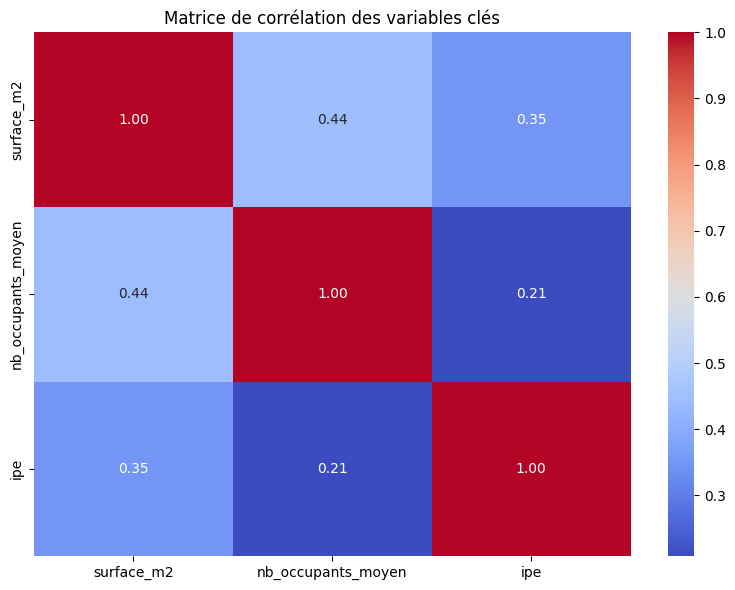

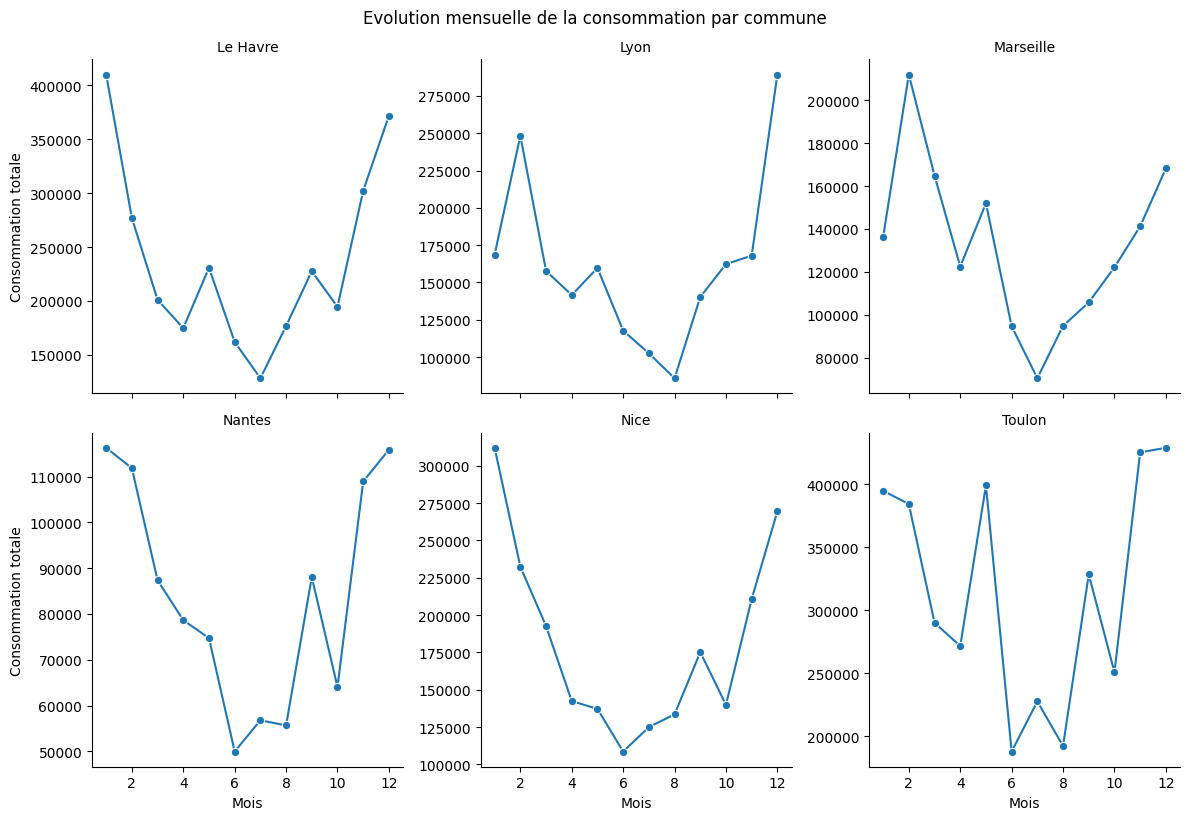

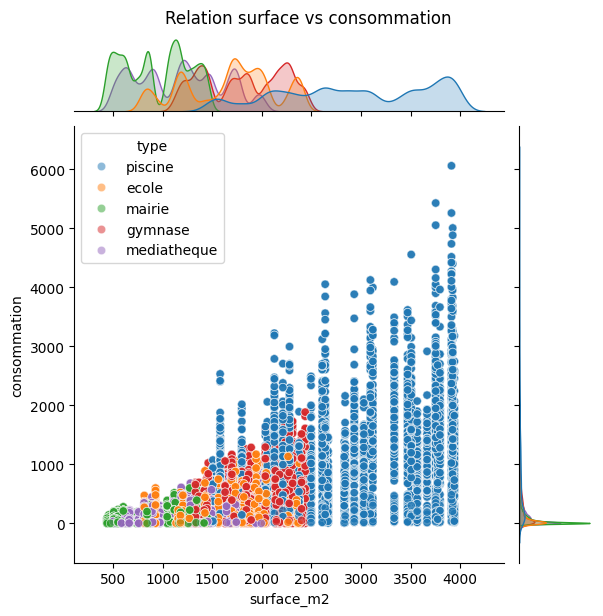

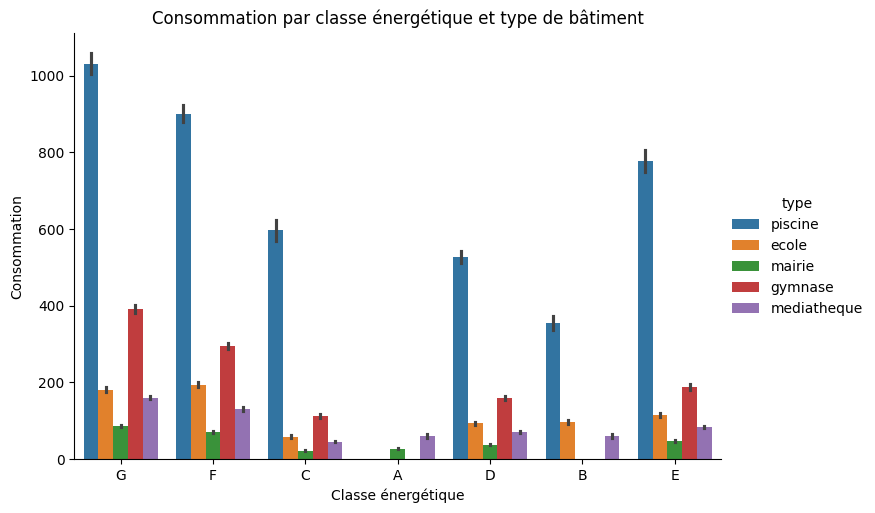

✅ Visualisations Seaborn créées et sauvegardées dans '../output/figures/'


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


df = pd.read_csv("../output/consommations_enrichies.csv")

# Conversion des dates
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['month'] = df['timestamp'].dt.month
df['season'] = (df['month']%12 // 3 + 1)  # 1=hiver, 2=printemps, 3=été, 4=automne

# Nettoyage des colonnes numériques pour éviter les NaN
num_cols = ['consommation', 'electricite', 'gaz', 'eau', 'surface_m2', 'nb_occupants_moyen', 'ipe']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# 2. Violin plot de la consommation electrique par type de batiment

if 'electricite' in df.columns and 'type' in df.columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=df, x="type", y="electricite")
    plt.title("Distribution de la consommation électrique par type de bâtiment")
    plt.ylabel("Consommation électrique (kWh)")
    plt.xlabel("Type de bâtiment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../output/figures/violin_electricite.png", dpi=300)
    plt.show()
    plt.close()


# 3. Heatmap annotee de la matrice de correlation complete

corr_cols = [c for c in ['electricite', 'gaz', 'eau', 'surface_m2', 'nb_occupants_moyen', 'ipe'] if c in df.columns]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation des variables clés")
plt.tight_layout()
plt.savefig(f"../output/figures/heatmap_correlation.png", dpi=300)
plt.show()
plt.close()


# 4. FacetGrid : evolution mensuelle par commune (top 6 communes)
if 'commune' in df.columns:
    top_communes = df['commune'].value_counts().nlargest(6).index
    df_top = df[df['commune'].isin(top_communes)]
    df_monthly = df_top.groupby(['month', 'commune'])['consommation'].sum().reset_index()

    g = sns.FacetGrid(df_monthly, col="commune", col_wrap=3, height=4, sharey=False)
    g.map_dataframe(sns.lineplot, x="month", y="consommation", marker="o")
    g.set_axis_labels("Mois", "Consommation totale")
    g.set_titles("{col_name}")
    plt.suptitle("Evolution mensuelle de la consommation par commune", y=1.02)
    plt.savefig(f"../output/figures/facetgrid_communes.png", dpi=300)
    plt.show()
    plt.close()


# 5. Jointplot : relation surface vs consommation avec distributions marginales

if 'surface_m2' in df.columns and 'consommation' in df.columns and 'type' in df.columns:
    sns.jointplot(
        data=df, x="surface_m2", y="consommation", kind="scatter", hue="type", alpha=0.5
    )
    plt.suptitle("Relation surface vs consommation", y=1.02)
    plt.savefig(f"../output/figures/jointplot_surface_consommation.png", dpi=300)
    plt.show()
    plt.close()


# 6. Catplot : consommation par classe energetique et type de batiment

if 'classe_energetique' in df.columns and 'type' in df.columns:
    sns.catplot(
        data=df, x="classe_energetique", y="consommation", hue="type",
        kind="bar", height=5, aspect=1.5
    )
    plt.title("Consommation par classe énergétique et type de bâtiment")
    plt.ylabel("Consommation")
    plt.xlabel("Classe énergétique")
    plt.savefig(f"../output/figures/catplot_classe_energetique.png", dpi=300)
    plt.show()
    plt.close()

print("✅ Visualisations Seaborn créées et sauvegardées dans '../output/figures/'")
